In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empyrical
%matplotlib inline

# 中国债市

In [2]:
df = pd.read_excel('./data/cn.xlsx', index_col=0)

In [3]:
K = 242
df['return'] = df['065.CS'].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_return(x))
df['volatility'] = df['065.CS'].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_volatility(x))
df['sharpe'] = df['065.CS'].pct_change().rolling(window=K).apply(lambda x: empyrical.sharpe_ratio(x))

In [4]:
sample = df.resample('M').last()

In [8]:
sample = sample.dropna()

<Container object of 178 artists>

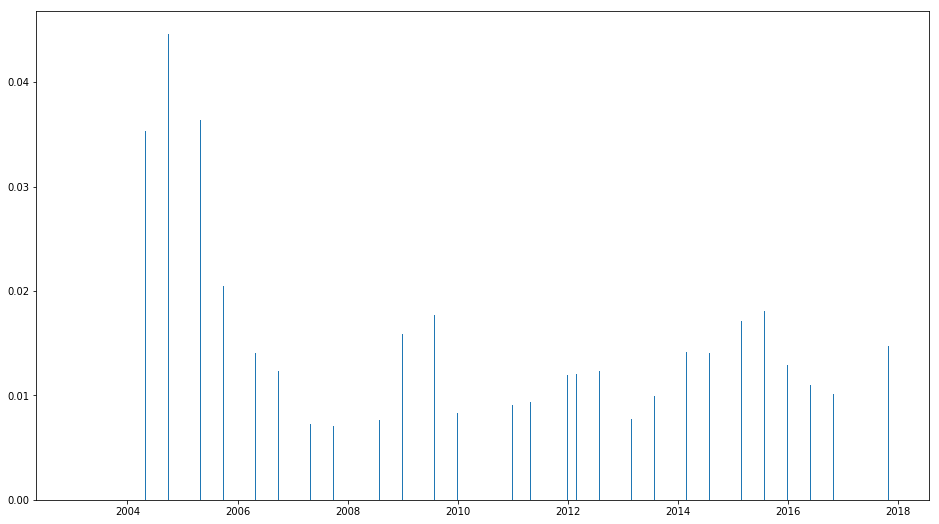

In [15]:
fig = plt.figure(figsize=(16, 9))
# ax = fig.add_subplot(111)
plt.bar(sample.index, sample['volatility'])
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

[Text(0,0,u'-1.00%'),
 Text(0,0,u'0.00%'),
 Text(0,0,u'1.00%'),
 Text(0,0,u'2.00%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'6.00%')]

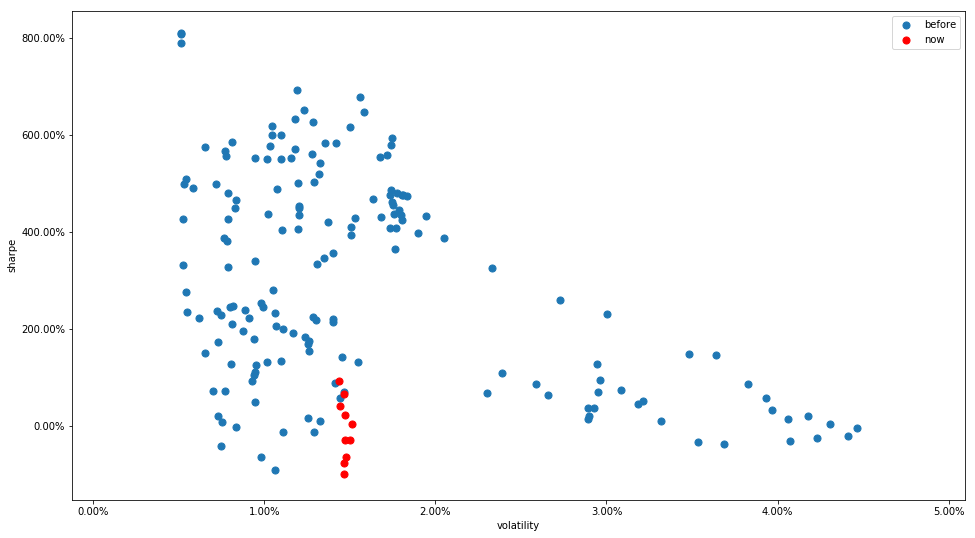

In [16]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
split = '2017-01-01'
plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['sharpe'], label='before', s=50)
plt.scatter(sample[sample.index >= split]['volatility'], sample[sample.index >= split]['sharpe'], color='r', label='now', s=50)
plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('sharpe')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

In [17]:
df.dropna(inplace=True)

In [18]:
quantiles = df.quantile(np.arange(0., 1.1, 0.1))['volatility']

In [19]:
ret = pd.Series(index=range(quantiles.shape[0] - 1))
for i, q in enumerate(quantiles):
    if i != 0:
        avg_ret = df[(df['volatility'] >= quantiles.iloc[i-1]) & (df['volatility'] <= quantiles.iloc[i])]['sharpe'].mean()
        print avg_ret
        ret.iloc[i-1] = avg_ret
ret = pd.DataFrame(ret, columns=['sharpe'])
ret['group'] = ['Group %d'%(i+1) for i in range(ret.shape[0])]

3.9357719932
3.0034979054
2.11896632903
3.83013896695
3.62476148999
3.03667733407
2.29660644085
4.70768358527
1.68470278392
0.284766199908


[Text(0,0,u'0.00%'),
 Text(0,0,u'100.00%'),
 Text(0,0,u'200.00%'),
 Text(0,0,u'300.00%'),
 Text(0,0,u'400.00%'),
 Text(0,0,u'500.00%')]

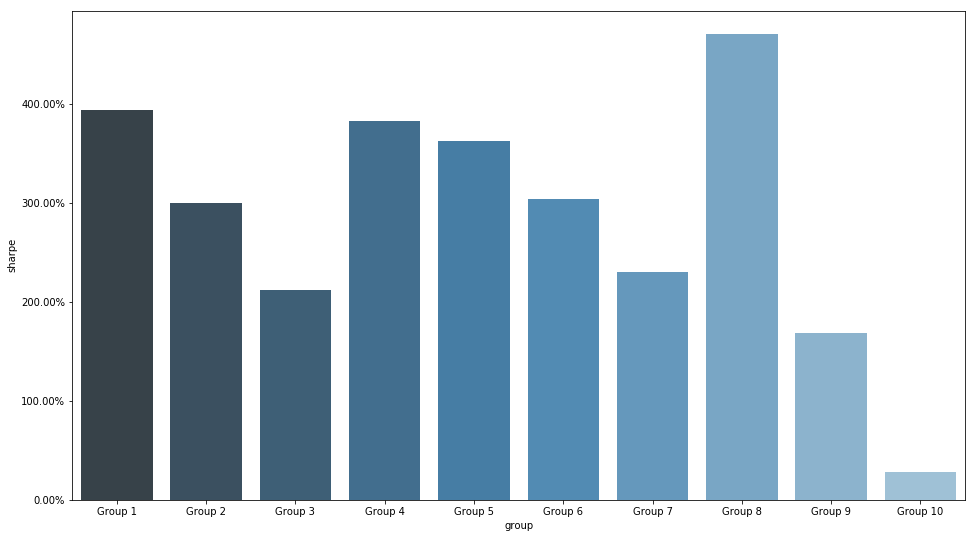

In [20]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sns.barplot('group', 'sharpe', data=ret, palette="Blues_d")
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

# 美国债市

In [21]:
df = pd.read_excel('./data/Barclay bond index.xlsx', index_col=0)

In [22]:
df.head()

,PX_LAST,CHG_PCT_1D
Date,,
1989-01-03,346.18,-0.18
1989-01-04,346.53,0.10
1989-01-05,345.91,-0.18
1989-01-06,346.18,0.08
1989-01-09,346.70,0.15


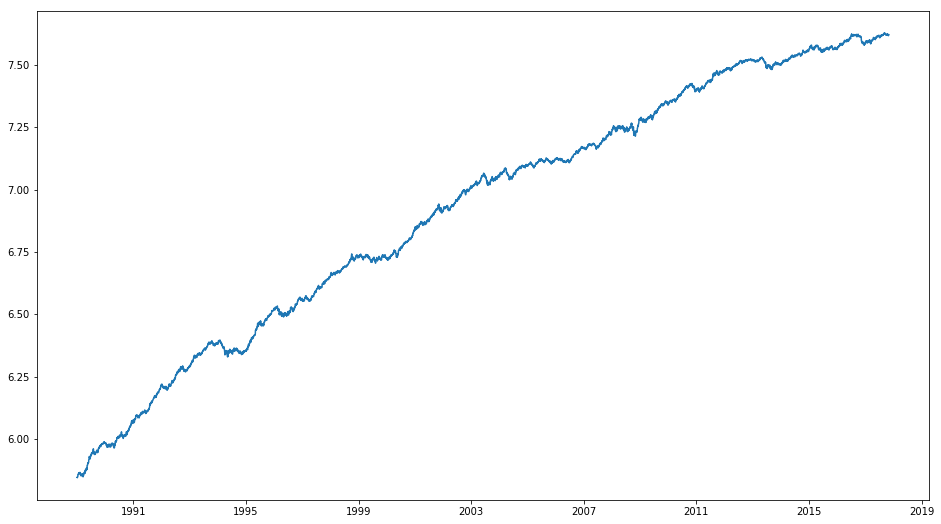

In [23]:
fig = plt.figure(figsize=(16, 9))
plt.plot(np.log(df['PX_LAST']))

In [24]:
K = 242
df['return'] = df['PX_LAST'].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_return(x))
df['volatility'] = df['PX_LAST'].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_volatility(x))
df['sharpe'] = df['PX_LAST'].pct_change().rolling(window=K).apply(lambda x: empyrical.sharpe_ratio(x))

In [25]:
sample = df.resample('M').last()
sample = sample[sample.index >= '1989-01-01']

[Text(0,0,u'0.00%'),
 Text(0,0,u'1.00%'),
 Text(0,0,u'2.00%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'6.00%'),
 Text(0,0,u'7.00%')]

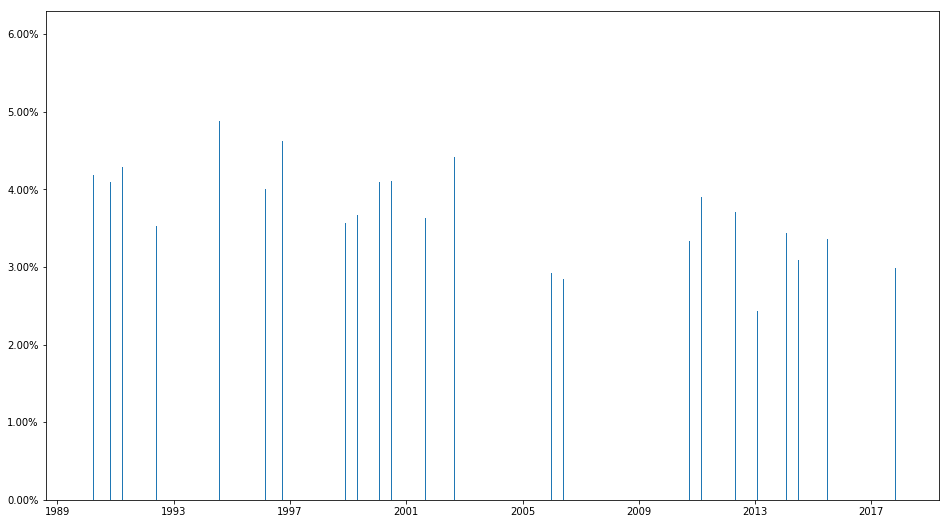

In [26]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
plt.bar(sample.index, sample['volatility'])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

[Text(0,0,u'1.00%'),
 Text(0,0,u'2.00%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'6.00%'),
 Text(0,0,u'7.00%')]

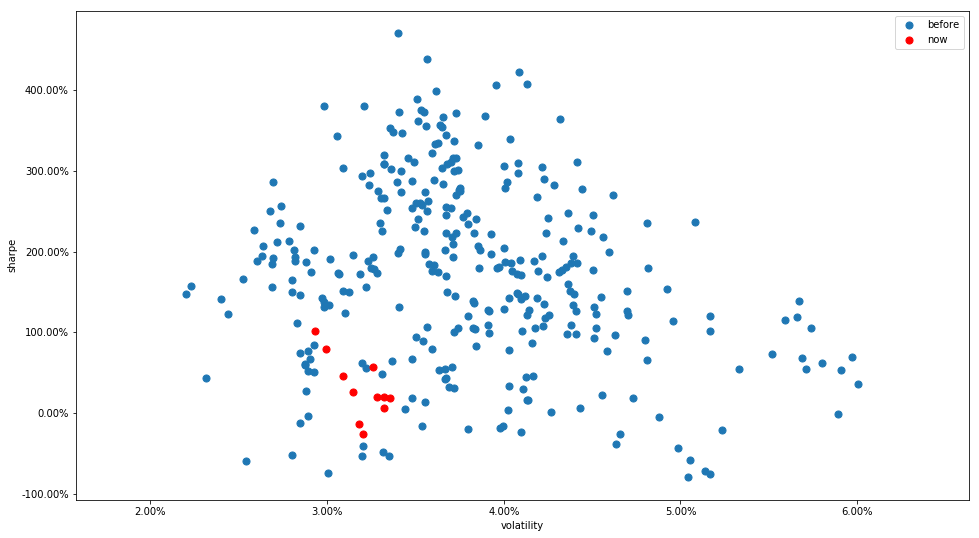

In [27]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
split = '2017-01-01'
plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['sharpe'], label='before', s=50)
plt.scatter(sample[sample.index >= split]['volatility'], sample[sample.index >= split]['sharpe'], color='r', label='now', s=50)
plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('sharpe')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

# 根据波动率划分5个级别

In [28]:
df.head()

,PX_LAST,CHG_PCT_1D,return,volatility,sharpe
Date,,,,,
1989-01-03,346.18,-0.18,NaN,NaN,NaN
1989-01-04,346.53,0.10,NaN,NaN,NaN
1989-01-05,345.91,-0.18,NaN,NaN,NaN
1989-01-06,346.18,0.08,NaN,NaN,NaN
1989-01-09,346.70,0.15,NaN,NaN,NaN


In [29]:
df.dropna(inplace=True)

In [30]:
quantiles = df.quantile(np.arange(0., 1.1, 0.1))['volatility']

In [31]:
quantiles

0.0    0.021946
0.1    0.028821
0.2    0.032115
0.3    0.034018
0.4    0.035883
0.5    0.037070
0.6    0.038935
0.7    0.040961
0.8    0.043431
0.9    0.046655
1.0    0.060513
Name: volatility, dtype: float64

In [32]:
ret = pd.Series(index=range(quantiles.shape[0] - 1))
for i, q in enumerate(quantiles):
    if i != 0:
        avg_ret = df[(df['volatility'] >= quantiles.iloc[i-1]) & (df['volatility'] <= quantiles.iloc[i])]['sharpe'].mean()
        print avg_ret
        ret.iloc[i-1] = avg_ret
ret = pd.DataFrame(ret, columns=['sharpe'])
ret['group'] = ['Group %d'%(i+1) for i in range(ret.shape[0])]

1.49744673492
1.16278855743
1.84159678885
2.22802275024
2.39150322352
1.96670791373
1.67271094385
1.66340447492
1.53508415073
0.693844050481


In [33]:
ret

,sharpe,group
0,1.497447,Group 1
1,1.162789,Group 2
2,1.841597,Group 3
3,2.228023,Group 4
4,2.391503,Group 5
5,1.966708,Group 6
6,1.672711,Group 7
7,1.663404,Group 8
8,1.535084,Group 9
9,0.693844,Group 10


[Text(0,0,u'0.00%'),
 Text(0,0,u'50.00%'),
 Text(0,0,u'100.00%'),
 Text(0,0,u'150.00%'),
 Text(0,0,u'200.00%'),
 Text(0,0,u'250.00%'),
 Text(0,0,u'300.00%')]

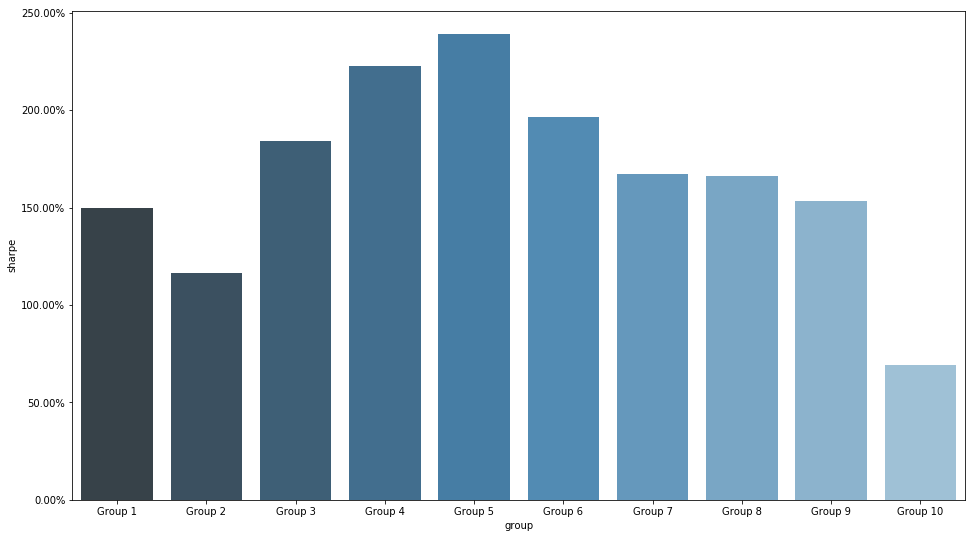

In [34]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sns.barplot('group', 'sharpe', data=ret, palette="Blues_d")
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

# 美债按时间划分阶段

## 1990-1994

[Text(0,0,u'2.50%'),
 Text(0,0,u'2.75%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.25%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'3.75%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.25%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'4.75%'),
 Text(0,0,u'5.00%')]

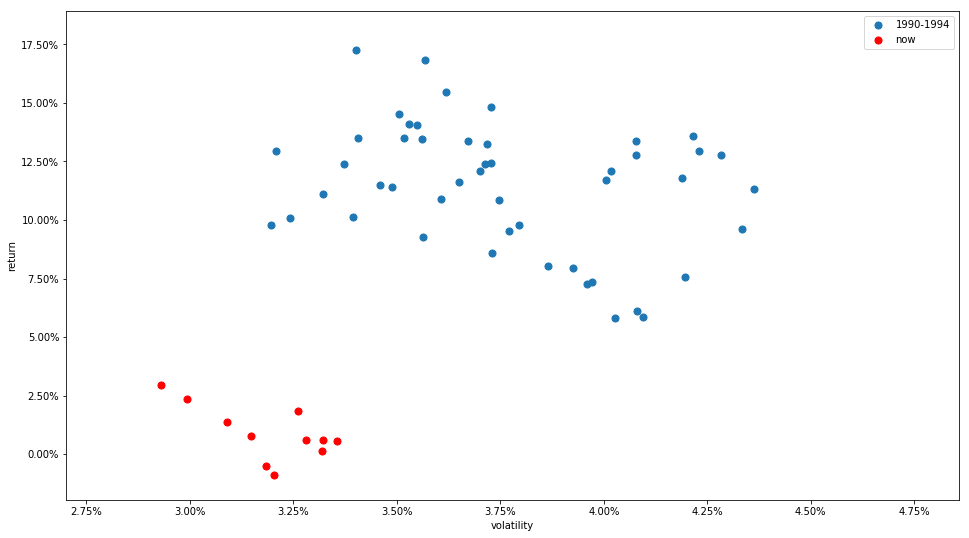

In [35]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '1990-01-01')&(sample.index <= '1994-01-01')]['volatility'],
            sample[(sample.index >= '1990-01-01')&(sample.index <= '1994-01-01')]['return'], label='1990-1994', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 1994-1995

[Text(0,0,u'2.50%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'5.50%'),
 Text(0,0,u'6.00%')]

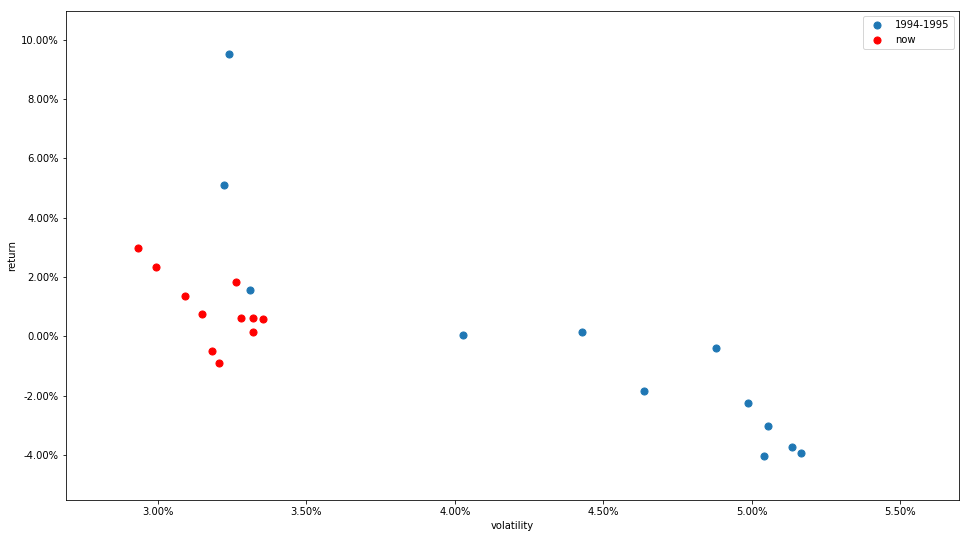

In [37]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '1994-01-01')&(sample.index <= '1995-01-01')]['volatility'],
            sample[(sample.index >= '1994-01-01')&(sample.index <= '1995-01-01')]['return'], label='1994-1995', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 1995-1999

[Text(0,0,u'2.00%'),
 Text(0,0,u'2.50%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'5.50%'),
 Text(0,0,u'6.00%')]

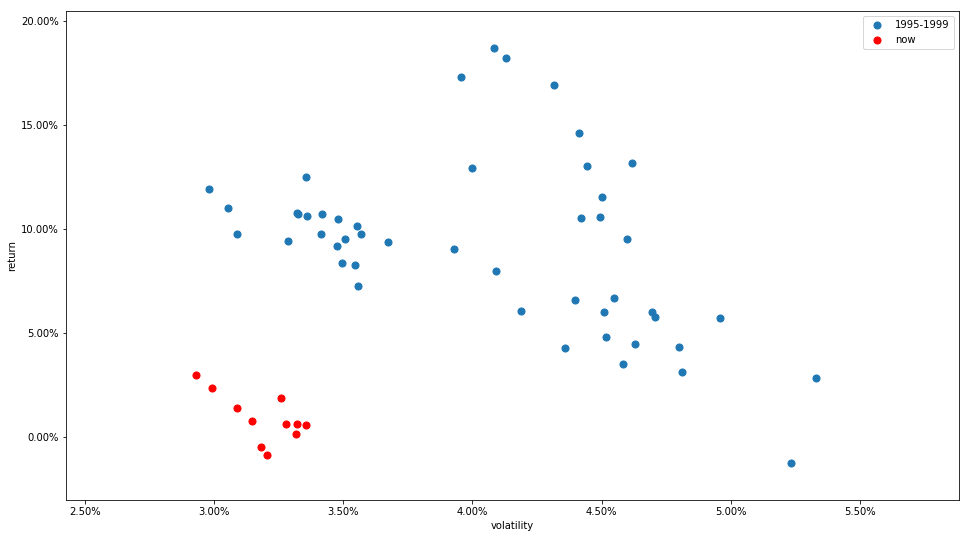

In [38]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '1995-01-01')&(sample.index <= '1999-01-01')]['volatility'],
            sample[(sample.index >= '1995-01-01')&(sample.index <= '1999-01-01')]['return'], label='1995-1999', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 1999-2000

[Text(0,0,u'2.75%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.25%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'3.75%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.25%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'4.75%')]

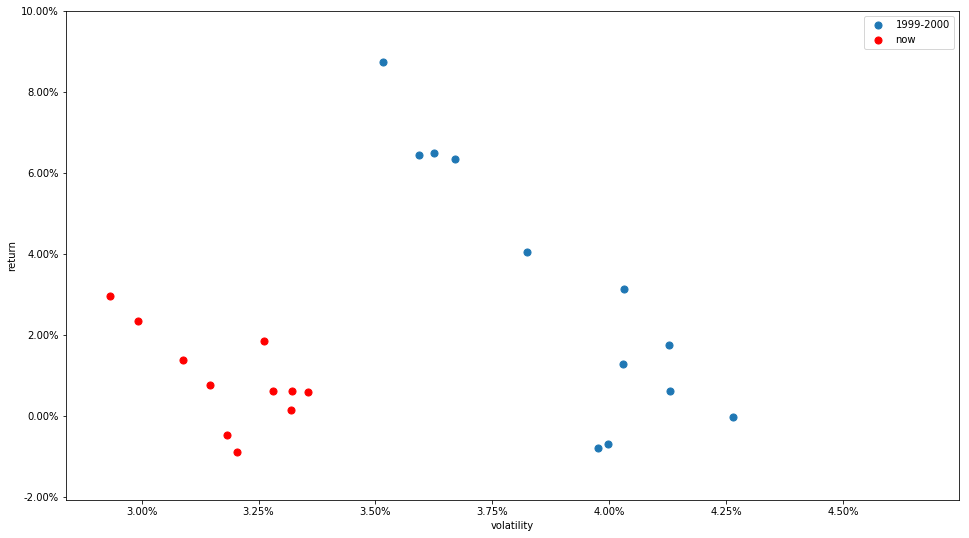

In [39]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '1999-01-01')&(sample.index <= '2000-01-01')]['volatility'],
            sample[(sample.index >= '1999-01-01')&(sample.index <= '2000-01-01')]['return'], label='1999-2000', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 2000-2004

[Text(0,0,u'2.75%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.25%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'3.75%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.25%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'4.75%'),
 Text(0,0,u'5.00%')]

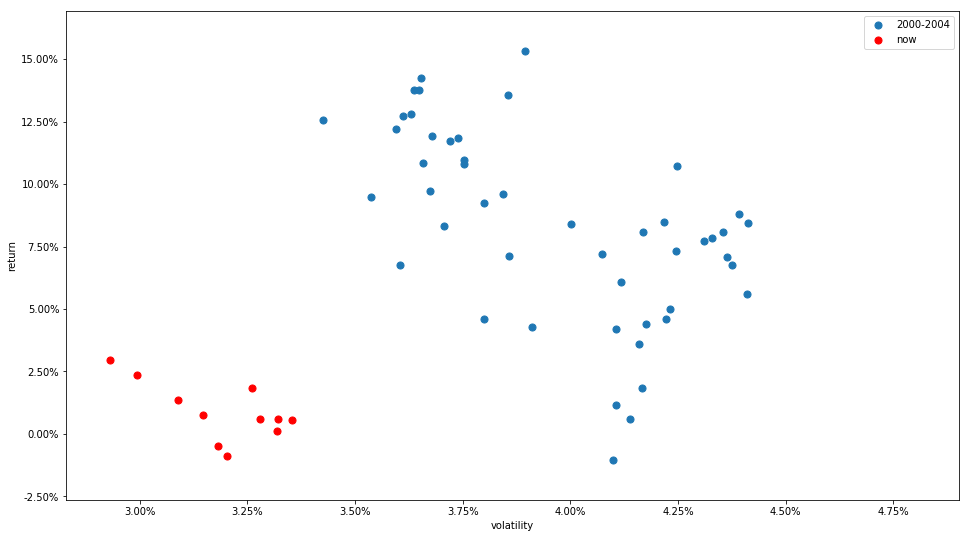

In [40]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '2000-01-01')&(sample.index <= '2004-01-01')]['volatility'],
            sample[(sample.index >= '2000-01-01')&(sample.index <= '2004-01-01')]['return'], label='2000-2004', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 2004-2007

[Text(0,0,u'2.00%'),
 Text(0,0,u'2.50%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.50%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.50%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'5.50%')]

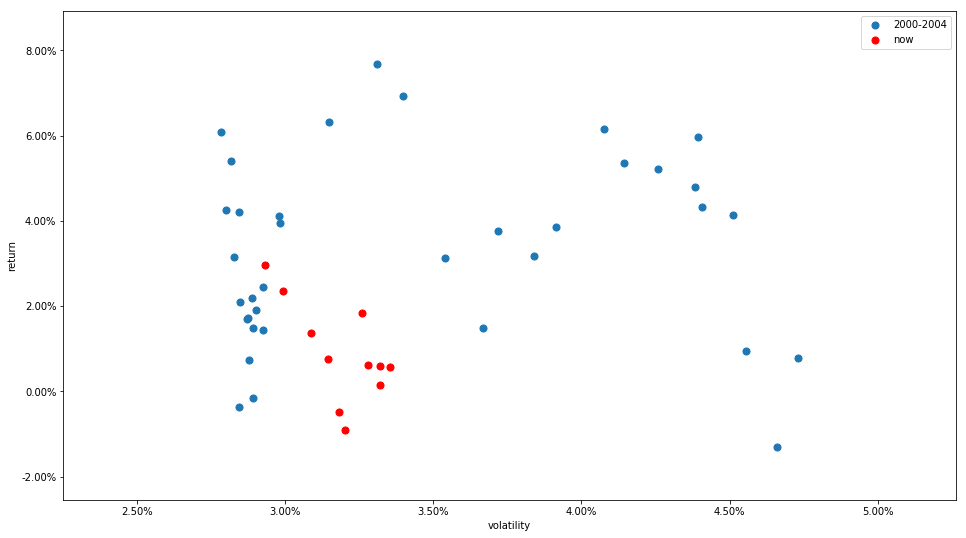

In [41]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '2004-01-01')&(sample.index <= '2007-01-01')]['volatility'],
            sample[(sample.index >= '2004-01-01')&(sample.index <= '2007-01-01')]['return'], label='2000-2004', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 2007-2016

[Text(0,0,u'1.00%'),
 Text(0,0,u'2.00%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'5.00%'),
 Text(0,0,u'6.00%'),
 Text(0,0,u'7.00%')]

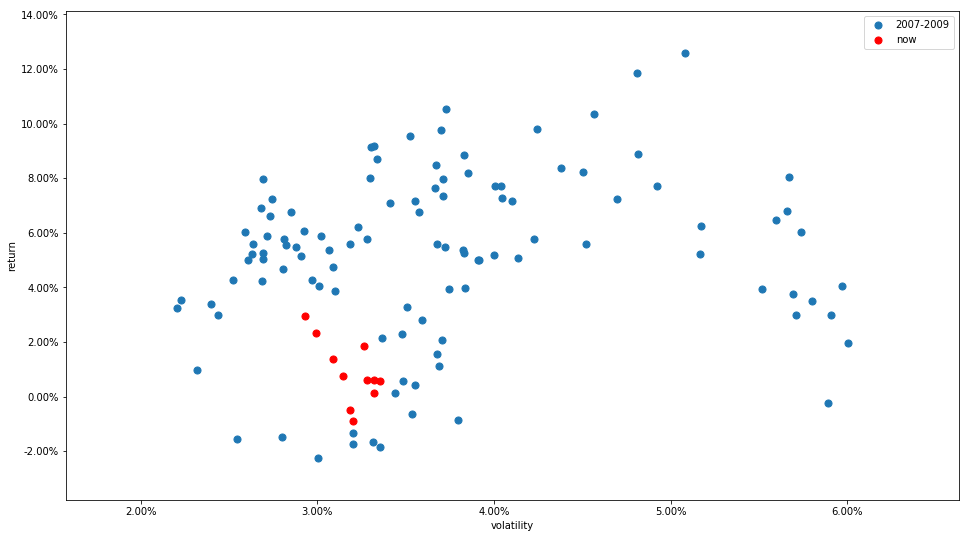

In [43]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '2007-01-01')&(sample.index <= '2016-01-01')]['volatility'],
            sample[(sample.index >= '2007-01-01')&(sample.index <= '2016-01-01')]['return'], label='2007-2009', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])

## 2009-2017

[Text(0,0,u'2.40%'),
 Text(0,0,u'2.60%'),
 Text(0,0,u'2.80%'),
 Text(0,0,u'3.00%'),
 Text(0,0,u'3.20%'),
 Text(0,0,u'3.40%'),
 Text(0,0,u'3.60%'),
 Text(0,0,u'3.80%'),
 Text(0,0,u'4.00%'),
 Text(0,0,u'4.20%')]

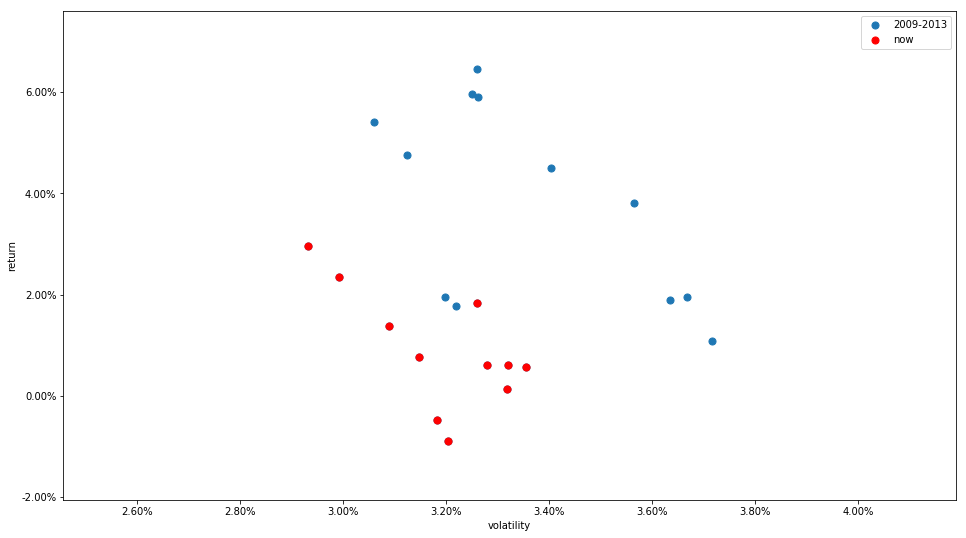

In [45]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# plt.scatter(sample[sample.index < split]['volatility'], sample[sample.index < split]['return'], label='before', s=50)
# plt.scatter(sample[(sample.index>='2009-01-01')&(sample.index<split)]['volatility'], 
#             sample[(sample.index >= '2009-01-01')&(sample.index<split)]['return'], label='2000-2017', s=50)
plt.scatter(sample[(sample.index >= '2016-01-01')&(sample.index <= '2018-01-01')]['volatility'],
            sample[(sample.index >= '2016-01-01')&(sample.index <= '2018-01-01')]['return'], label='2009-2013', s=50)
plt.scatter(sample[sample.index >= '2017-01-01']['volatility'], sample[sample.index >= '2017-01-01']['return'], color='r', label='now', s=50)

plt.legend()
ax.set_xlabel('volatility')
ax.set_ylabel('return')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])